#  Bureau of Consumer Financial Protection - Consumer Complaint Database 

All the Import Statements needed for the given problem

In [2]:
import pandas as pd
import matplotlib.pyplot as mpl
import numpy as np

Loading the Customer complaints CSV file into Pandas

In [105]:
view_data = pd.read_csv('/home/anushya/Documents/Consumer_Complaints.csv')  #Load the Consumer_Complaints.csv file into pandas from the given path

/home/anushya/proj1/local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# PART-1: Grouping the data and plotting Histogram with Product column

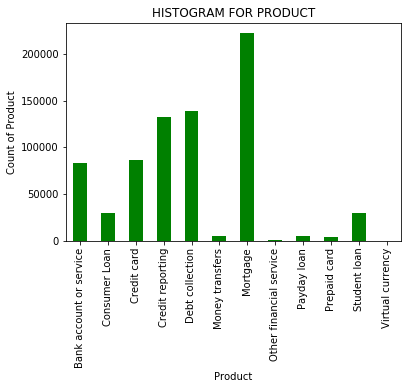

In [106]:
#To show the plot in Notebook
%matplotlib inline  
#grouping the data for histogram
data_group = view_data.groupby(['Product'])['Issue'].agg('count').plot(kind='bar',color='green') 
mpl.title('HISTOGRAM FOR PRODUCT')
mpl.ylabel('Count of Product')

# PART-2: Filtering the Complaints by date and plotting Histogram for Product

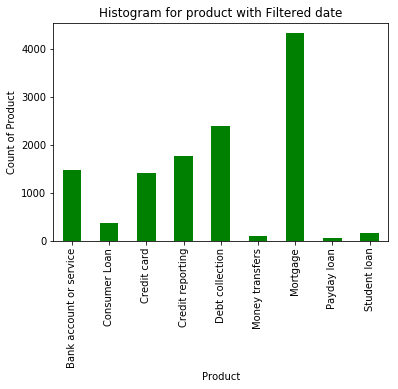

In [107]:
#Filtering the required range of date
filter_date = view_data.ix['01/01/2013':'12/31/2015']
#Grouping it for plotting
date_group = filter_date.groupby(['Product'])['Complaint ID'].agg('count').plot(kind='bar',color='green')
mpl.title('Histogram for product with Filtered date')
mpl.ylabel('Count of Product')


# PART-3 : Aggregating the data and plotting the Stacked Bar Chart

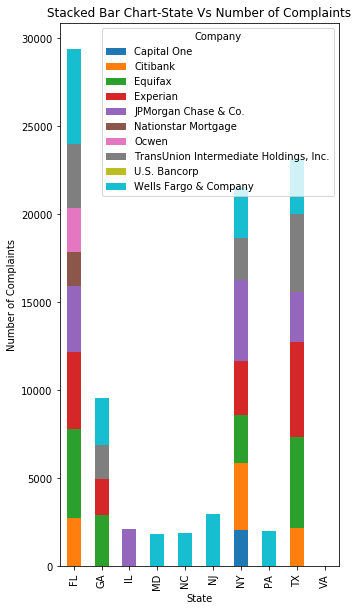

In [108]:
#aggregating Complaint ID with State and Company
agg_group = view_data.groupby(['State','Company'])['Complaint ID'].agg('count')
data_new=agg_group.sort_values(ascending=False)[0:50]
#Creating new Dataframe
new_data = data_new.unstack(level=1,fill_value=0)
#Selecting the required rows and columns
plot_df = new_data.iloc[1:15,1:15]
#Plotting Stacked Bar Chart
plot_df.plot(kind='bar',stacked=True,figsize=(5,10))
mpl.ylabel('Number of Complaints')
mpl.title('Stacked Bar Chart-State Vs Number of Complaints')




# PART-4 :Plotting stacked bar chart for companies with most of issues

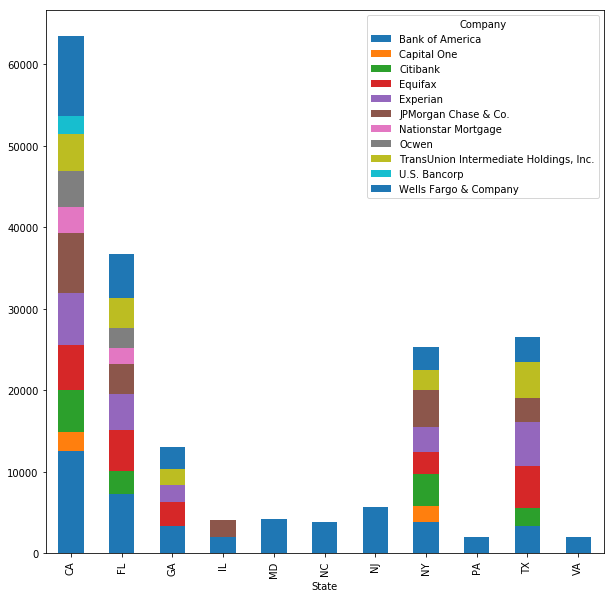

In [109]:
issue_company = view_data.groupby(['State','Company'])['Issue'].agg('count')
issue_company_sort = issue_company.sort_values(ascending = False)[0:50]
issue_company_df = issue_company_sort.unstack(level=1)
issue_company_plot = issue_company_df
issue_company_plot.plot(kind='bar',stacked=True,figsize=(10,10))